In [ ]:
#Data Analytics and Visualization (CS/IT312)
#Assignment 9
#Name: Snehal Nalawade
#ID: 202151160

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


• Data contains Weight, Height and Gender of a human survey
(weight-height.csv).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Reading the CSV file and extracting the "Height" data:

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DAV sem 6/weight-height.csv')
ht_data = data['Height']

In [ ]:
# Number of samples to take
numOfSamples = 10000
# Sample size
sampleSize = 100

1. Verify the Central Limit Theorem using the ”Height” feature of the data.

Computing sample means for the given sample size:

In [ ]:
sampleMeans = []
for _ in range(numOfSamples):
    sample = np.random.choice(ht_data, size=sampleSize, replace=True)
    sampleMean = np.mean(sample)
    sampleMeans.append(sampleMean)

Plotting the distribution of sample means and comparing with a normal distribution:

In [ ]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

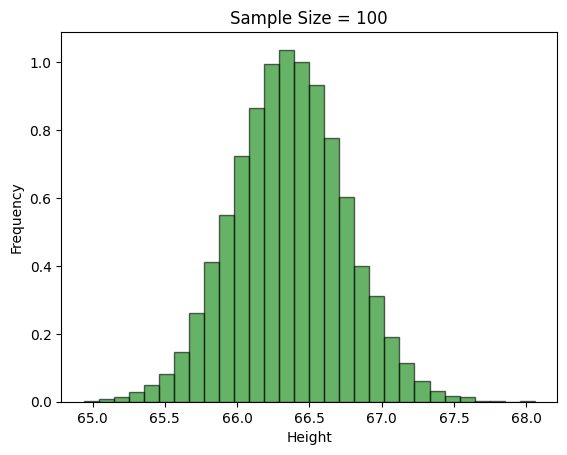

In [ ]:
plt.hist(sampleMeans, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Sample Size = {}'.format(sampleSize))
plt.xlabel('Height')
plt.ylabel('Frequency')

Plotting normal distribution for comparison:

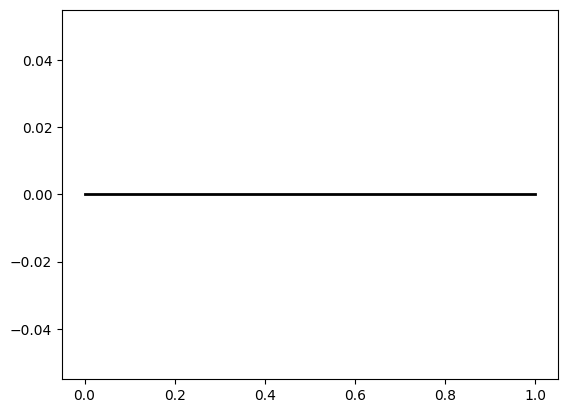

In [ ]:
mu = np.mean(sampleMeans)
sigma = np.std(sampleMeans)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

2. Perform the Bootstrap on ”Height” feature of the data.


In [ ]:
# Number of bootstrap samples
numBootstrapSamples = 1000


In [ ]:
# Perform bootstrap resampling
bootstrapSamples = []
bootstrapSampleMeans = []
for _ in range(numBootstrapSamples):
    # Generate a bootstrap sample by sampling with replacement from the original data
    bootstrapSample = np.random.choice(ht_data, size=len(ht_data), replace=True)

    # Store the bootstrap sample
    bootstrapSamples.append(bootstrapSample)

    # Calculate the mean of the bootstrap sample
    bootstrapSampleMean = sum(bootstrapSample) / len(bootstrapSample)

    # Append the bootstrap sample mean to the list
    bootstrapSampleMeans.append(bootstrapSampleMean)


In [ ]:
print(bootstrapSamples)

[array([64.08353972, 71.25353511, 60.26719012, ..., 65.01708725,
       63.9575827 , 65.46247042]), array([66.20275583, 67.91531408, 61.69433713, ..., 63.49530291,
       59.30778715, 66.41315594]), array([68.38886947, 65.36153819, 65.09677602, ..., 65.70001271,
       64.9365559 , 65.42607816]), array([70.03067329, 61.97668615, 64.71588569, ..., 68.50781491,
       69.23842719, 60.6342463 ]), array([68.76436014, 71.67636717, 68.03473112, ..., 68.02228235,
       68.75899269, 64.36248027]), array([64.05697554, 62.0041303 , 72.3595    , ..., 65.69358887,
       64.98197829, 68.2152298 ]), array([73.50736001, 64.74142541, 68.30453594, ..., 62.77184716,
       63.86799221, 63.67128785]), array([67.90361205, 69.50364737, 62.85937379, ..., 65.41105299,
       67.65689279, 68.72922819]), array([60.84893452, 62.32308708, 76.01230001, ..., 65.97904809,
       64.4645503 , 60.4571772 ]), array([66.69530922, 59.02808724, 63.54636972, ..., 64.74579099,
       70.64357719, 71.60855972]), array([62

bootstrapSamples contains the bootstrap resampled datasets, and each element of bootstrapSamples is a numpy array representing one bootstrap sample

3. Calculate the Confidence Interval of 95 % using sample means derived using Bootstrap

In [ ]:
# Compute the 95% confidence interval
confidenceInterval = np.percentile(bootstrapSampleMeans, [2.5, 97.5])

In [ ]:
print("Bootstrap Confidence Interval (95%):", confidenceInterval)

Bootstrap Confidence Interval (95%): [66.29161871 66.43805156]
